# Datta analysis and visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the csv file

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')

# Preview data -- Which features are categorical vs numerical

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# What is the distribution of numerical feature values across the samples?

In [4]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Which features contain blank, null or empty values?

In [5]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

# to findout number of null values in Each column and suming their count


In [6]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df['reviews_per_month'].fillna(0,inplace = True)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df['name'].fillna("-",inplace=True)


In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df.drop(['last_review'],axis=1,inplace=True)

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [13]:
df['host_name'].fillna("-",inplace=True)

In [14]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Types of Neighbourhood groups and their price

In [15]:
df.neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

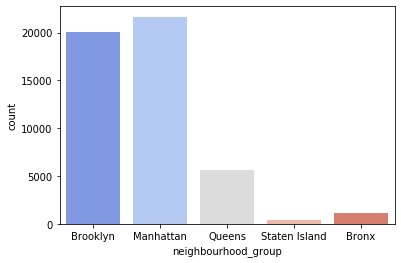

In [17]:
#This Shows that most of Airbnb sitting in NewYork are near Brooklyn and Manhattan
sns.countplot(x='neighbourhood_group',data=df,palette='coolwarm')

# Checking the types of room in the NewYork Aibnbs

In [18]:
df['room_type'].value_counts()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

# the average of neighbourhood_group and room_type

In [19]:
 df.groupby(['neighbourhood_group','room_type']).mean()

id       host_id   latitude  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt  2.269787e+07  1.037373e+08  40.848013   
                    Private room     2.235896e+07  1.060786e+08  40.849158   
                    Shared room      2.705442e+07  1.123450e+08  40.840873   
Brooklyn            Entire home/apt  1.730117e+07  4.861704e+07  40.685211   
                    Private room     1.894125e+07  6.242636e+07  40.685513   
                    Shared room      2.358634e+07  1.040423e+08  40.669307   
Manhattan           Entire home/apt  1.866860e+07  6.557697e+07  40.758266   
                    Private room     1.880759e+07  6.982314e+07  40.776002   
                    Shared room      2.115615e+07  9.666720e+07  40.770035   
Queens              Entire home/apt  2.112772e+07  8.713280e+07  40.728993   
                    Private room     2.197231e+07  1.008169e+08  40.732940   
                    Shared room      2.469434e+07  1.123200e+08  40.734411   
Staten Island       Entire home/apt  2.170833e+07  9.618779e+07  40.605728   
                    Private room     2.106201e+07  1.017539e+08  40.614450   
                    Shared room      3.061484e+07  7.713866e+07  40.609894   

                                     longitude       price  minimum_nights  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt -73.880363  127.506596        5.957784   
                    Private room    -73.886172   66.788344        3.858896   
                    Shared room     -73.893407   59.800000        3.366667   
Brooklyn            Entire home/apt -73.955603  178.327545        6.531332   
                    Private room    -73.947150   76.500099        5.539479   
                    Shared room     -73.948156   50.527845        7.753027   
Manhattan           Entire home/apt -73.978402  249.239109       10.539283   
                    Private room    -73.968506  116.776622        5.446880   
                    Shared room     -73.971700   88.977083        6.766667   
Queens              Entire home/apt -73.874459  147.050573        5.369752   
                    Private room    -73.871716   71.762456        5.120107   
                    Shared room     -73.872973   69.020202        4.232323   
Staten Island       Entire home/apt -74.109460  173.846591        6.238636   
                    Private room    -74.103089   62.292553        3.632979   
                    Shared room     -74.091077   57.444444        2.333333   

                                     number_of_reviews  reviews_per_month  \
neighbourhood_group room_type                                               
Bronx               Entire home/apt          30.678100           1.824749   
                    Private room             25.018405           1.319371   
                    Shared room               7.200000           0.968833   
Brooklyn            Entire home/apt          27.945183           1.125341   
                    Private room             21.086952           0.990650   
                    Shared room              14.026634           0.752010   
Manhattan           Entire home/apt          17.815516           0.862068   
                    Private room             26.202706           1.145254   
                    Shared room              21.400000           1.329646   
Queens              Entire home/apt          28.933206           1.635038   
                    Private room             27.746441           1.548200   
                    Shared room              13.863636           1.169091   
Staten Island       Entire home/apt          33.278409           1.767955   
                    Private room             30.159574           1.437074   
                    Shared room               1.555556           0.740000   

                                     calculated_host_listings_count  \
neighbourhoo

In [20]:
df.groupby(['room_type']).mean()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.045509,10.698335,111.920304
Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.143493,3.227717,111.203933
Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.073345,4.662931,162.000862


# use seaborn to create a countplot of the neighbourhood_group with the hue based off of the room_type column

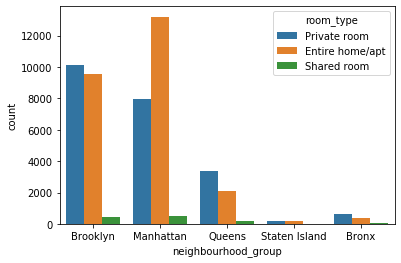

In [21]:
sns.countplot(x='neighbourhood_group',hue='room_type',data=df)



# use seaborn to create a countplot of the room_type w

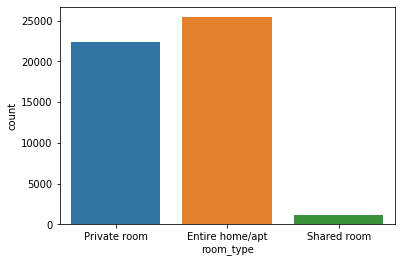

In [22]:
sns.countplot(x='room_type',data=df)


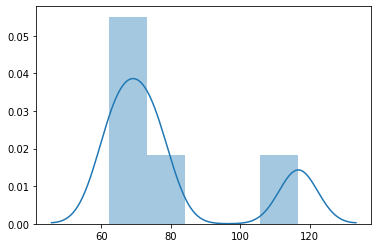

In [23]:
df1 = df[df['room_type'] == "Private room"][["neighbourhood_group","price"]]
d=df1.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

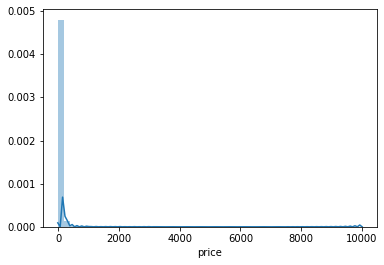

In [24]:
d=df[df.room_type=='Private room']['price']
sns.distplot(d)

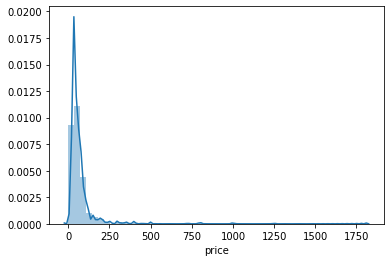

In [25]:
d= df[df['room_type']=='Shared room']['price']
sns.distplot(d)

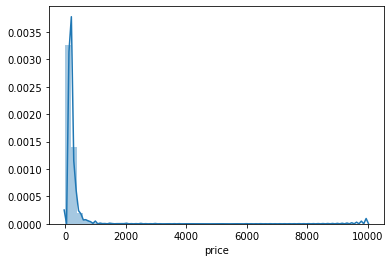

In [26]:
d = df[df['room_type']=='Entire home/apt']['price']
sns.distplot(d)

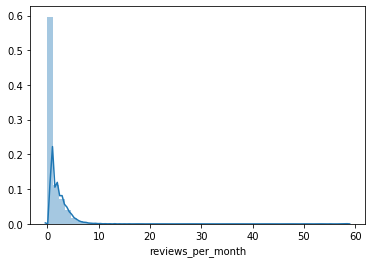

In [27]:
sns.distplot(df['reviews_per_month'])
plt.show()

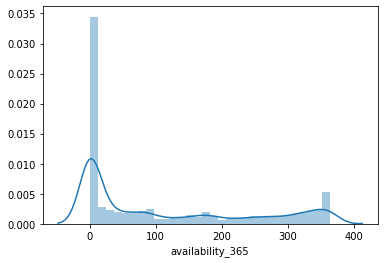

In [28]:
sns.distplot(df['availability_365'])

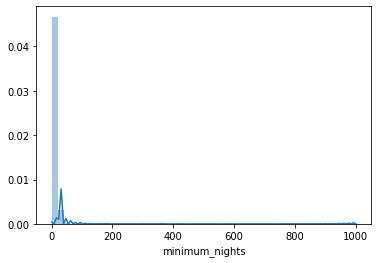

In [29]:
df1 = df[df['room_type']=="Private room"]['minimum_nights']
sns.distplot(df1)

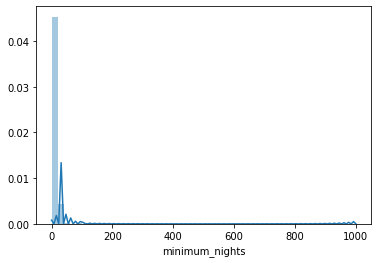

In [30]:
df1 = df[df['room_type']=="Shared room"]['minimum_nights']
sns.distplot(df1)

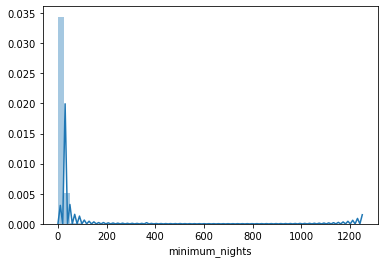

In [31]:
df1 = df[df['room_type']=="Entire home/apt"]['minimum_nights']
sns.distplot(df1)

In [32]:
df1=df['host_id'].value_counts()
df1

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
25237492      34
119669058     34
76104209      33
113805886     33
213781715     33
238321374     32
51501835      31
50760546      31
224414117     30
13347167      29
39528519      28
417504        28
            ... 
209237058      1
18594883       1
29285454       1
202449469      1
7708014        1
48677964       1
4443213        1
5960171        1
49753169       1
32846930       1
15535189       1
91757655       1
3266249        1
1723485        1
101809002      1
50945119       1
21148770       1
63407204       1
48161896       1
113110121      1
15397994       1
14337132       1
19729266       1
156843123      1
45483124       1
1641589        1
4070519        1
208106618     

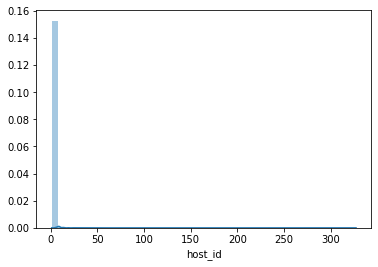

In [33]:
sns.distplot(df1)

# let's what we can do with our given longtitude and latitude columns


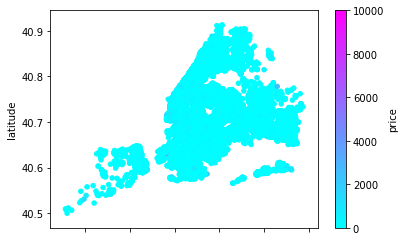

In [34]:
df.plot.scatter(x='longitude', y='latitude', c='price',cmap='cool')

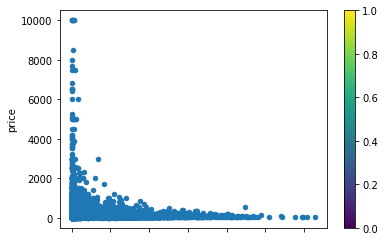

In [35]:
df.plot.scatter(x='number_of_reviews', y='price',cmap='cool')

# Let's define the Independet Variable: X and the Dependent Variable: y

In [36]:
d=df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']]

In [37]:
# Let's define the Independet Variable: X and the Dependent Variable: y
X = d.iloc[:, :].values

In [38]:
X

array([[ 4.064749e+01, -7.397237e+01,  1.490000e+02, ...,  9.000000e+00,
         2.100000e-01,  3.650000e+02],
       [ 4.075362e+01, -7.398377e+01,  2.250000e+02, ...,  4.500000e+01,
         3.800000e-01,  3.550000e+02],
       [ 4.080902e+01, -7.394190e+01,  1.500000e+02, ...,  0.000000e+00,
         0.000000e+00,  3.650000e+02],
       ...,
       [ 4.081475e+01, -7.394867e+01,  1.150000e+02, ...,  0.000000e+00,
         0.000000e+00,  2.700000e+01],
       [ 4.075751e+01, -7.399112e+01,  5.500000e+01, ...,  0.000000e+00,
         0.000000e+00,  2.000000e+00],
       [ 4.076404e+01, -7.398933e+01,  9.000000e+01, ...,  0.000000e+00,
         0.000000e+00,  2.300000e+01]])

In [39]:
g=df[['calculated_host_listings_count']]

In [40]:
y=g.iloc[:,:].values

# Fitting Simple Linear Regression to the Training set


In [41]:
# Fitting Simple Linear Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X,y)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

# Predicting the Test set results

In [42]:
# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

array([4.55, 4.6 , 1.1 , ..., 1.15, 4.15, 1.15])

In [43]:
regressor.score(X, y)

0.9762658217626072